# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from utils import *

In [2]:
df = pd.read_csv("../data/processed/after_prep.csv")
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  Price    Brand  Series Type  Mileage (kmpl)  Engine (CC)  \
0    5.0   1.75   Maruti   Wagon    R           26.60        998.0   
1    5.0  12.50  Hyundai   Creta  1.6           19.67       1582.0   
2    5.0   4.50    Honda    Jazz    V           18.20       1199.0   
3    7.0   6.00   Maruti  Ertiga  VDI           20.77       1248.0   
4    5.0  17.74     Audi      A4  New           15.20       1968.0   

   Power (bhp)  
0        58.16  
1       126.20  
2        88.70  
3        88.76  
4       140.80

In [3]:
df.describe()

Year  Kilometers_Driven        Seats        Price  \
count  6019.000000       6.019000e+03  5976.000000  6019.000000   
mean   2013.358199       5.873838e+04     5.279618     9.479468   
std       3.269742       9.126884e+04     0.806019    11.187917   
min    1998.000000       1.710000e+02     2.000000     0.440000   
25%    2011.000000       3.400000e+04     5.000000     3.500000   
50%    2014.000000       5.300000e+04     5.000000     5.640000   
75%    2016.000000       7.300000e+04     5.000000     9.950000   
max    2019.000000       6.500000e+06    10.000000   160.000000   

       Mileage (kmpl)  Engine (CC)  Power (bhp)  
count     5949.000000  5983.000000  5876.000000  
mean        18.342252  1621.276450   113.253050  
std          4.175475   601.355233    53.874957  
min          6.400000    72.000000    34.200000  
25%         15.300000  1198.000000    75.000000  
50%         18.200000  1493.000000    97.700000  
75%         21.100000  1984.000000   138.100000  
max         33.540000  5998.000000   560.000000

<AxesSubplot:>

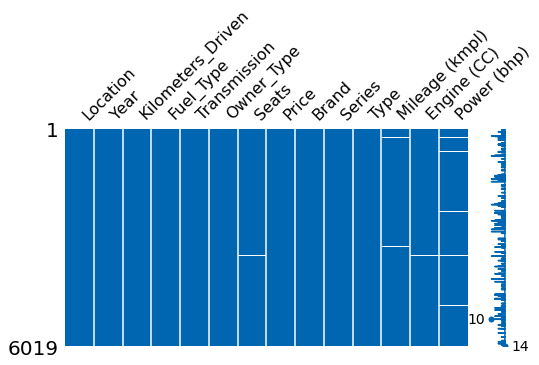

In [4]:
msno.matrix(df, color=(0, 0.4, 0.7), figsize=(8, 4))

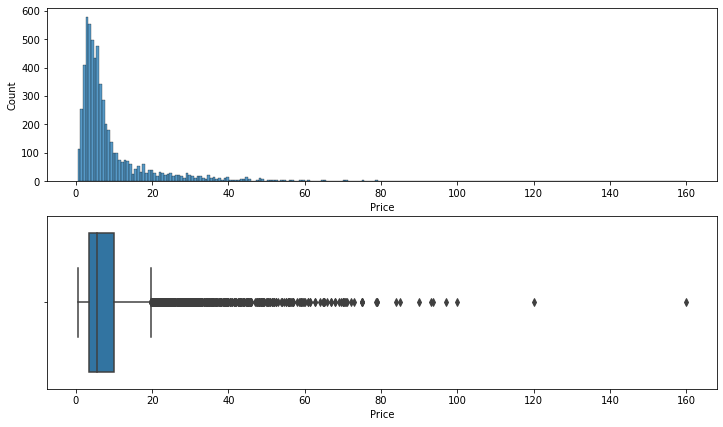

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12, 7))
sns.histplot(data=df, x="Price", ax=ax[0])
sns.boxplot(data=df, x="Price", ax=ax[1])
plt.show()

In [6]:
df[df["Price"] > 80]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1505       Kochi  2019              26013    Diesel    Automatic      First   
1974  Coimbatore  2018              28060    Petrol    Automatic      First   
1984   Bangalore  2017              17465    Petrol    Automatic      First   
2095  Coimbatore  2019               2526    Petrol    Automatic      First   
4079   Hyderabad  2017              25000    Diesel    Automatic      First   
4691   Bangalore  2014               3000    Petrol    Automatic     Second   
5535   Ahmedabad  2015              97003    Diesel    Automatic      First   
5781       Delhi  2011               6500    Petrol    Automatic      Third   
5919   Hyderabad  2015               8000    Petrol    Automatic      First   

      Seats   Price          Brand     Series    Type  Mileage (kmpl)  \
1505    5.0   97.07           Land      Rover   Range           12.65   
1974    5.0   93.67            BMW          7  Series           12.05   
1984    5.0   93.00            BMW          7  Series           12.05   
2095    2.0   83.96  Mercedes-Benz        SLC      43           19.00   
4079    5.0  160.00           Land      Rover   Range           13.33   
4691    2.0   90.00  Mercedes-Benz  SLK-Class      55           12.00   
5535    5.0   85.00            BMW         X6  xDrive           15.87   
5781    2.0  120.00    Lamborghini   Gallardo   Coupe            6.40   
5919    2.0  100.00         Jaguar          F    Type           12.50   

      Engine (CC)  Power (bhp)  
1505       2993.0       255.00  
1974       2979.0       320.00  
1984       2979.0       320.00  
2095       2996.0       362.07  
4079       2993.0       255.00  
4691       5461.0       421.00  
5535       2993.0       308.43  
5781       5204.0       560.00  
5919       5000.0       488.10

In [7]:
num_cols = [
    col for col in df.drop(columns="Price").columns if df[col].dtype != "object"
]
cat_cols = [
    col for col in df.drop(columns="Price").columns if df[col].dtype == "object"
]

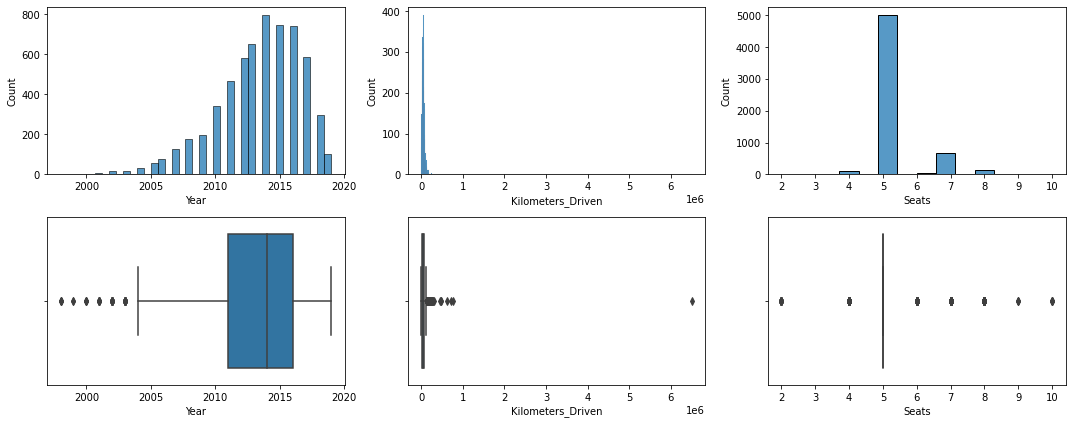

In [8]:
plt.figure(figsize=(15, 6))

for index, col in enumerate(num_cols[:3]):
    plt.subplot(2, 3, index + 1)
    sns.histplot(data=df, x=col)

for index, col in enumerate(num_cols[:3]):
    plt.subplot(2, 3, index + 4)
    sns.boxplot(data=df, x=col)

plt.tight_layout()
plt.show()

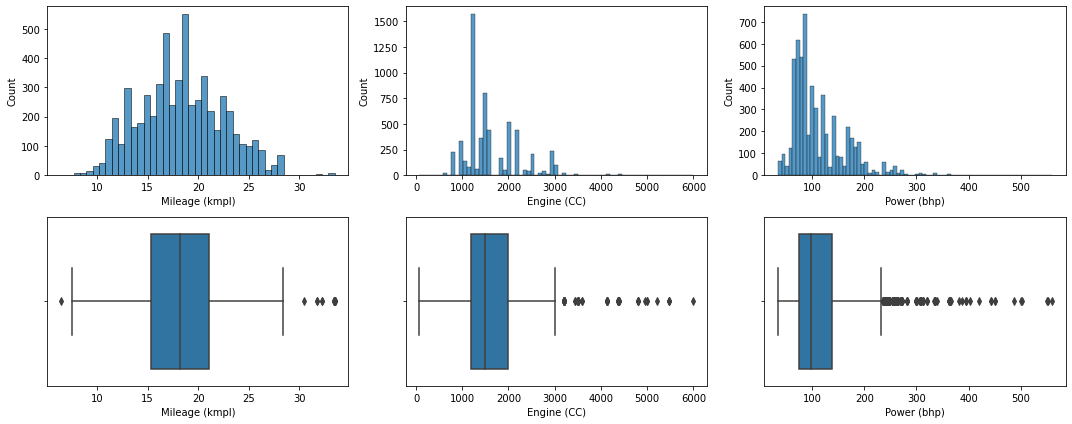

In [9]:
plt.figure(figsize=(15, 6))

for index, col in enumerate(num_cols[3:]):
    plt.subplot(2, 3, index + 1)
    sns.histplot(data=df, x=col)

for index, col in enumerate(num_cols[3:]):
    plt.subplot(2, 3, index + 4)
    sns.boxplot(data=df, x=col)

plt.tight_layout()
plt.show()

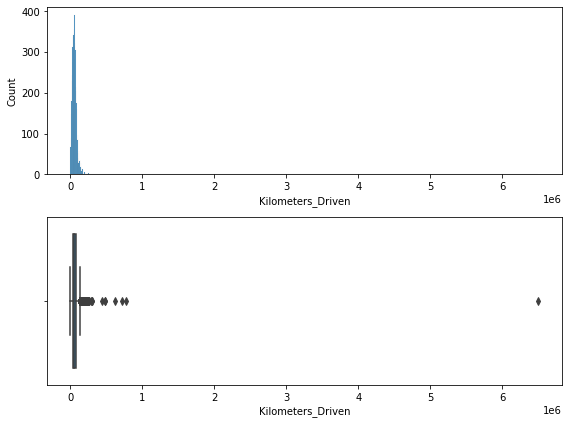

In [10]:
plt.figure(figsize=(8, 6))
plt.subplot(211)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(212)
sns.boxplot(data=df, x="Kilometers_Driven")
plt.tight_layout()
plt.show()

In [11]:
df = df[~(df.Kilometers_Driven > 1e6)]
df.shape

(6018, 14)

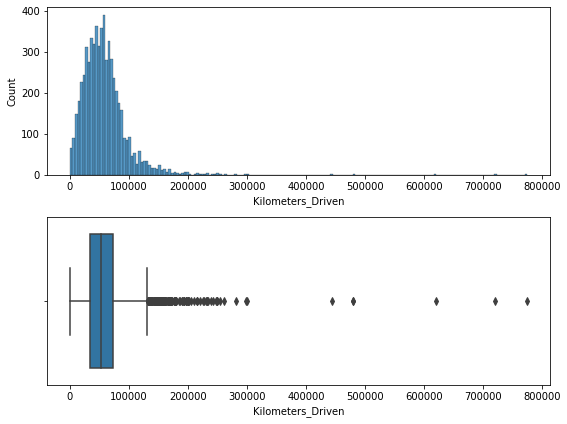

In [12]:
plt.figure(figsize=(8, 6))
plt.subplot(211)
sns.histplot(data=df, x="Kilometers_Driven")
plt.subplot(212)
sns.boxplot(data=df, x="Kilometers_Driven")
plt.tight_layout()
plt.show()

In [13]:
df[df.Seats >= 9]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
814        Pune  2004              77757    Diesel       Manual     Second   
917      Mumbai  2013              20000    Diesel       Manual      First   
1347  Bangalore  2007              74112    Diesel       Manual      First   
1907  Bangalore  2002              63000    Diesel       Manual      Third   
2267       Pune  2004             215750    Diesel       Manual     Second   
2312    Kolkata  2012              67132    Diesel       Manual      First   
2359    Chennai  2016             150000    Diesel       Manual      First   
2575  Hyderabad  2015             120000    Diesel       Manual      First   

      Seats  Price      Brand   Series Type  Mileage (kmpl)  Engine (CC)  \
814    10.0   3.50     Toyota   Qualis   FS           13.10       2446.0   
917    10.0   5.25       Tata     Sumo   DX           14.07       1978.0   
1347    9.0   4.10   Mahindra  Scorpio   LX           12.05       2179.0   
1907   10.0   3.65     Toyota   Qualis   FS           13.10       2446.0   
2267   10.0   3.50     Toyota   Qualis   RS             NaN       2446.0   
2312    9.0   4.75  Chevrolet   Tavera   LT           13.58       2499.0   
2359    9.0   4.50   Mahindra     Xylo   D2           14.95       2489.0   
2575   10.0   5.50  Chevrolet   Tavera   LS           14.80       2499.0   

      Power (bhp)  
814          75.0  
917          83.1  
1347        120.0  
1907         75.0  
2267          NaN  
2312         78.0  
2359         93.7  
2575         80.0

In [14]:
df.describe(include=["object"])

Location Fuel_Type Transmission Owner_Type   Brand Series  Type
count      6018      6018         6018       6018    6018   6018  6018
unique       11         5            2          4      30    212   339
top      Mumbai    Diesel       Manual      First  Maruti  Swift   1.5
freq        790      3204         4299       4928    1211    353   286

In [15]:
cat_cols

['Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Brand',
 'Series',
 'Type']

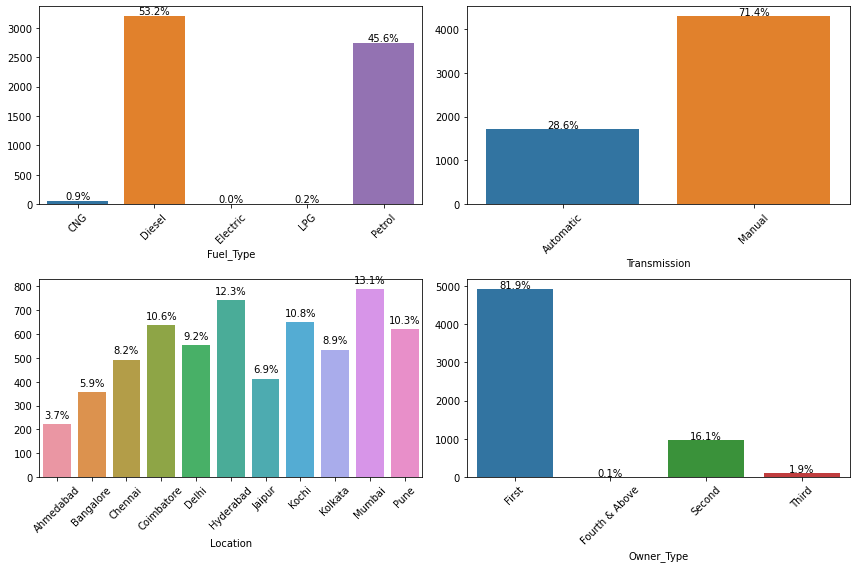

In [16]:
cols_toplot = ["Fuel_Type", "Transmission", "Location", "Owner_Type"]
plt.figure(figsize=(12, 8))
countplot_annot(2, 2, data=df, columns=cols_toplot, rotate=45, rcol=cols_toplot)
plt.tight_layout()
plt.show()

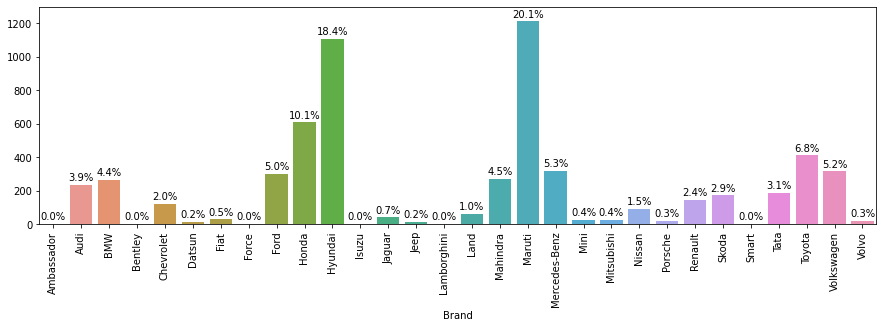

In [17]:
plt.figure(figsize=(15, 4))
countplot_annot(1, 1, data=df, columns=["Brand"], rotate=90, rcol=["Brand"])
plt.ylim(0, 1300)
plt.show()

In [18]:
fig = px.bar(
    y=df["Series"].value_counts()[:50],
    x=df["Series"].value_counts()[:50].keys(),
    text=df["Series"].value_counts()[:50],
)
fig.update_layout(autosize=False, width=1200, height=500)
fig.show()

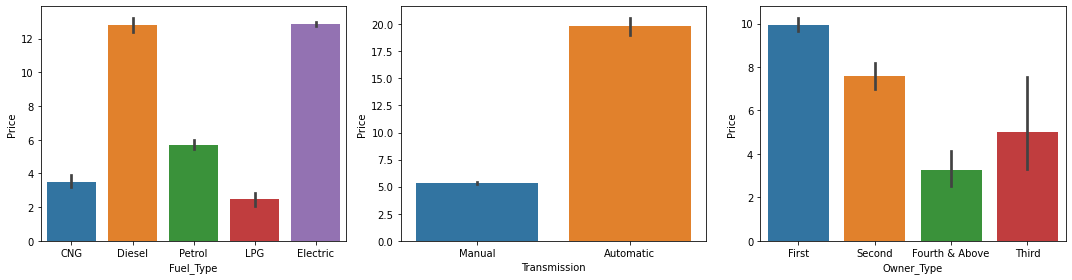

In [19]:
plt.figure(figsize=(15, 4))

for index, col in enumerate(["Fuel_Type", "Transmission", "Owner_Type"]):
    plt.subplot(1, 3, index + 1)
    sns.barplot(data=df, x=col, y="Price")

plt.tight_layout()
plt.show()

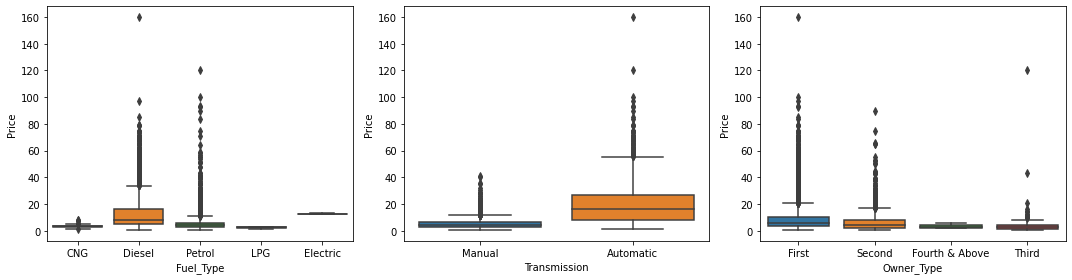

In [20]:
plt.figure(figsize=(15, 4))

for index, col in enumerate(["Fuel_Type", "Transmission", "Owner_Type"]):
    plt.subplot(1, 3, index + 1)
    sns.boxplot(data=df, x=col, y="Price")

plt.tight_layout()
plt.show()

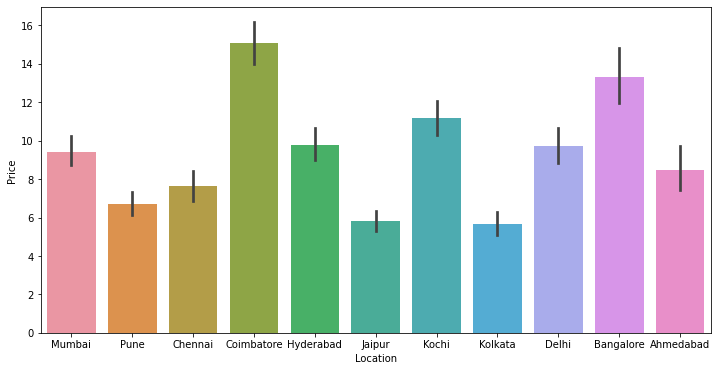

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Location", y="Price")
plt.show()

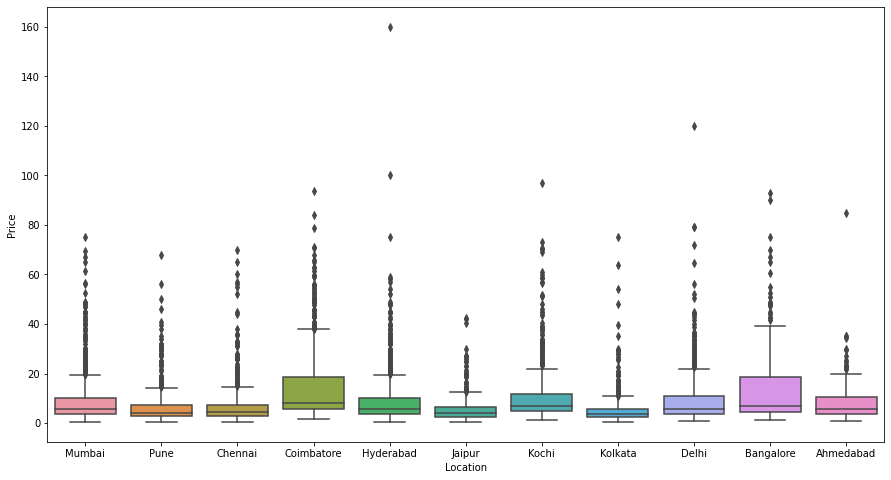

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="Location", y="Price")
plt.show()

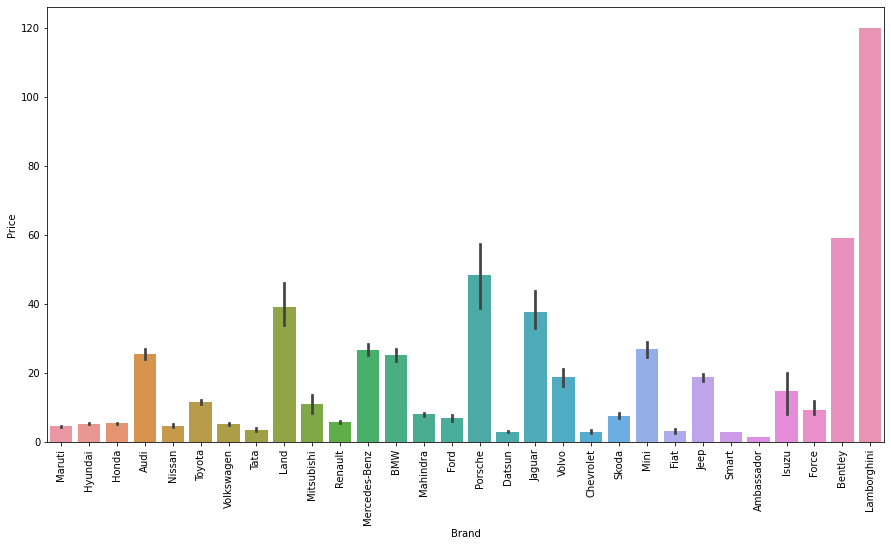

In [23]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="Brand", y="Price")
plt.xticks(rotation=90)
plt.show()

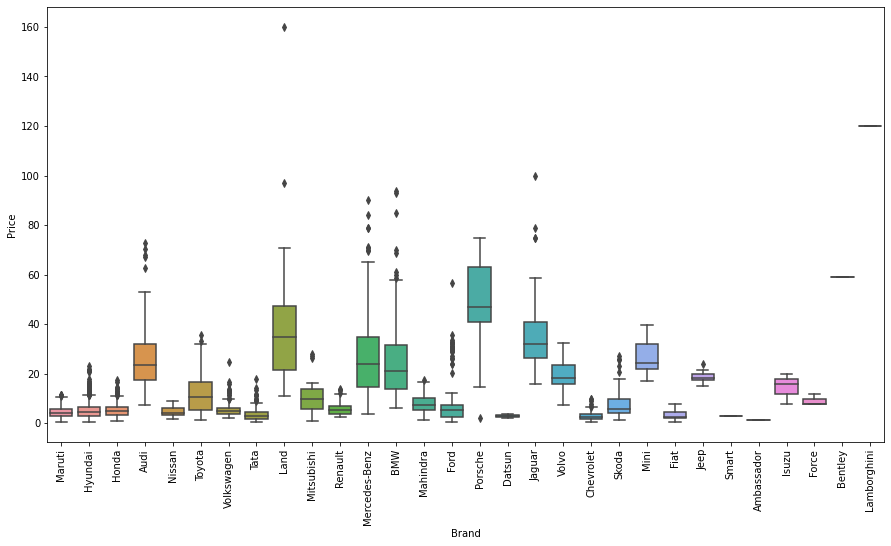

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x="Brand", y="Price")
plt.xticks(rotation=90)
plt.show()

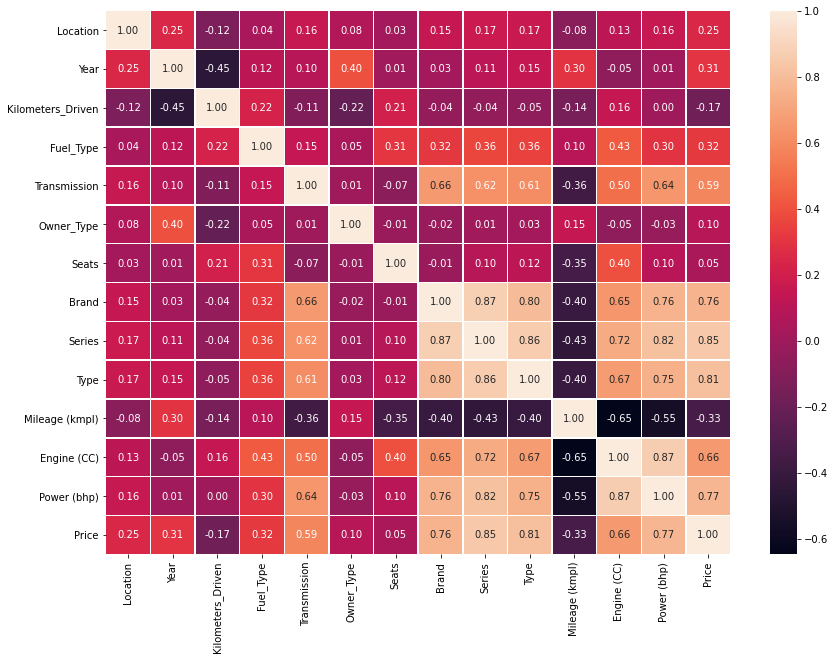

In [25]:
import category_encoders as ce

t_encoder = ce.TargetEncoder()
df_temp = t_encoder.fit_transform(df.drop(columns=["Price"]), df["Price"])
df_temp = pd.concat([df_temp, df["Price"]], axis=1)

plt.figure(figsize=(14, 10))
sns.heatmap(df_temp.corr(), annot=True, linewidths=0.5, fmt=".2f")
plt.show()

In [26]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Power (bhp)",
    y="Engine (CC)",
    size="Price",
    color="Transmission",
    hover_name="Brand",
    log_x=True,
    size_max=25,
)

fig.update_layout(title="Engine and Power correlation")
fig.show()

In [27]:
fig = px.scatter(
    df,
    x="Mileage (kmpl)",
    y="Engine (CC)",
    size="Price",
    color="Fuel_Type",
    hover_name="Brand",
    log_x=True,
    size_max=25,
)

fig.update_layout(title="Engine and Mileage correlation")
fig.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Year")["Price", "Mileage (kmpl)"].mean()
df_grp_scaled = MinMaxScaler().fit_transform(df_grp)
df_grp_scaled = pd.DataFrame(df_grp_scaled, columns=df_grp.columns, index=df_grp.index)

trace1 = go.Scatter(
    x=df_grp_scaled.index, y=df_grp_scaled["Price"], mode="lines+markers", name="Price"
)

trace2 = go.Scatter(
    x=df_grp_scaled.index,
    y=df_grp_scaled["Mileage (kmpl)"],
    mode="lines",
    name="Mileage (kmpl)",
)

data = [trace1, trace2]
layout = go.Layout(title="Price and Mileage over the time", xaxis=dict(title="Year"))

fig = go.Figure(data=data, layout=layout)


fig.show()

In [29]:
import plotly.graph_objects as go

df_grp = df.groupby(["Brand", "Transmission"], as_index=False)["Price"].median()
df_grp.sort_values(by="Price", inplace=True)
df_grp.head()

fig = px.bar(
    df_grp,
    x="Brand",
    y="Price",
    color="Transmission",
    title="Median price by Brand",
    height=500,
    width=800,
)

fig.show()

In [30]:
df_grp = df.groupby(["Brand"], as_index=False).agg(
    Median_Price=("Price", "median"), Count=("Price", "count")
)
df_grp.sort_values(by="Median_Price", inplace=True)
df_grp.head()

fig = px.bar(
    df_grp,
    x="Brand",
    y="Count",
    title="Count of Cars by Brand",
    text="Count",
    height=500,
    width=800,
)

fig.add_trace(
    go.Scatter(x=df_grp["Brand"], y=df_grp["Median_Price"] * 10, name="Median Price")
)

fig.show()

# Update for Final Presentation

In [31]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  Price    Brand  Series Type  Mileage (kmpl)  Engine (CC)  \
0    5.0   1.75   Maruti   Wagon    R           26.60        998.0   
1    5.0  12.50  Hyundai   Creta  1.6           19.67       1582.0   
2    5.0   4.50    Honda    Jazz    V           18.20       1199.0   
3    7.0   6.00   Maruti  Ertiga  VDI           20.77       1248.0   
4    5.0  17.74     Audi      A4  New           15.20       1968.0   

   Power (bhp)  
0        58.16  
1       126.20  
2        88.70  
3        88.76  
4       140.80

In [32]:
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.02
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.02
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(height=500, width=1400)

fig.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)
df_grp = df_grp[df_grp["car_count"] > 5]

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.02
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.02
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)

fig.add_trace(
    go.Bar(
        x=df_grp["Brand"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(height=500, width=1400)

fig.show()

In [34]:
df_grp = df.groupby("Brand", as_index=False).agg(
    car_count=("Brand", "count"), car_price=("Price", "median")
)
df_grp[df_grp["car_count"] < 5]

Brand  car_count  car_price
0    Ambassador          1       1.35
3       Bentley          1      59.00
7         Force          3       8.00
11        Isuzu          3      16.09
14  Lamborghini          1     120.00
25        Smart          1       3.00

In [35]:
from sklearn.preprocessing import MinMaxScaler

df_grp = df.groupby("Location", as_index=False).agg(
    car_count=("Location", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_price", ascending=False, inplace=True)

scaler = MinMaxScaler()
df_grp["car_count_scaled"] = (
    scaler.fit_transform(df_grp["car_count"].values.reshape(-1, 1)) + 0.1
)
df_grp["car_price_scaled"] = (
    scaler.fit_transform(df_grp["car_price"].values.reshape(-1, 1)) + 0.1
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=df_grp["Location"],
        y=df_grp["car_count_scaled"],
        text=df_grp["car_count"],
        textposition="auto",
        name="CAR COUNT",
    )
)

fig.add_trace(
    go.Bar(
        x=df_grp["Location"],
        y=df_grp["car_price_scaled"],
        text=df_grp["car_price"],
        textposition="auto",
        name="MEDIAN CAR PRICE",
    )
)
fig.update_layout(height=400, width=1000)

fig.show()

In [36]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  Price    Brand  Series Type  Mileage (kmpl)  Engine (CC)  \
0    5.0   1.75   Maruti   Wagon    R           26.60        998.0   
1    5.0  12.50  Hyundai   Creta  1.6           19.67       1582.0   
2    5.0   4.50    Honda    Jazz    V           18.20       1199.0   
3    7.0   6.00   Maruti  Ertiga  VDI           20.77       1248.0   
4    5.0  17.74     Audi      A4  New           15.20       1968.0   

   Power (bhp)  
0        58.16  
1       126.20  
2        88.70  
3        88.76  
4       140.80

In [37]:
df_grp = df.groupby(["Owner_Type", "Brand"]).agg(
    car_count=("Owner_Type", "count"), median_car_price=("Price", "median")
)
df_grp.sort_values(by="car_count", ascending=False, inplace=True)
df_grp.head(20)

car_count  median_car_price
Owner_Type Brand                                     
First      Maruti              1034             4.350
           Hyundai              912             4.970
           Honda                500             5.400
           Toyota               330            11.685
           Volkswagen           267             4.900
           Mercedes-Benz        261            26.000
           Ford                 234             6.000
           Mahindra             222             8.000
           BMW                  204            23.395
           Audi                 189            24.000
Second     Hyundai              175             3.150
           Maruti               153             2.500
First      Skoda                145             6.750
           Tata                 138             3.485
           Renault              127             5.400
Second     Honda                 93             3.850
First      Chevrolet             89             2.570
           Nissan                75             4.600
Second     Toyota                70             6.150
           Mercedes-Benz         56            14.750

In [38]:
df_grp = df.groupby(["Owner_Type", "Location", "Brand"], as_index=False).agg(
    car_count=("Owner_Type", "count"), median_car_price=("Price", "median")
)
df_grp.sort_values(by="car_count", ascending=False, inplace=True)
df_grp[df_grp["Location"] == "Ahmedabad"].head(20)

Owner_Type   Location          Brand  car_count  median_car_price
7        First  Ahmedabad         Maruti         46             4.450
5        First  Ahmedabad        Hyundai         42             5.175
4        First  Ahmedabad          Honda         25             4.750
14       First  Ahmedabad         Toyota         17            11.110
1        First  Ahmedabad            BMW         10            20.625
15       First  Ahmedabad     Volkswagen          8             4.500
13       First  Ahmedabad           Tata          7             2.900
6        First  Ahmedabad       Mahindra          7             9.900
254     Second  Ahmedabad        Hyundai          6             2.950
251     Second  Ahmedabad            BMW          5            17.500
250     Second  Ahmedabad           Audi          5            10.500
0        First  Ahmedabad           Audi          5            18.500
257     Second  Ahmedabad         Maruti          4             1.300
8        First  Ahmedabad  Mercedes-Benz          4            27.505
12       First  Ahmedabad          Skoda          4            10.375
256     Second  Ahmedabad       Mahindra          3             7.450
11       First  Ahmedabad        Renault          2             4.750
16       First  Ahmedabad          Volvo          2            16.000
253     Second  Ahmedabad          Honda          2             5.125
261     Second  Ahmedabad           Tata          2             1.000

In [39]:
df_grp = df.groupby(["Fuel_Type", "Brand"]).agg(
    car_count=("Fuel_Type", "count"), car_price=("Price", "median")
)
df_grp.sort_values(by="car_count", ascending=False, inplace=True)
df_grp.head(20)

car_count  car_price
Fuel_Type Brand                              
Petrol    Hyundai              742      3.860
          Maruti               693      3.250
          Honda                482      4.750
Diesel    Maruti               464      5.750
          Hyundai              356      5.910
          Toyota               311     12.000
          Mahindra             261      7.750
          Mercedes-Benz        239     26.000
          BMW                  238     21.945
          Audi                 217     23.680
          Ford                 206      5.450
          Volkswagen           168      5.195
Petrol    Volkswagen           147      4.630
Diesel    Honda                126      5.725
          Tata                 117      2.850
Petrol    Toyota                98      4.570
Diesel    Renault               96      6.500
Petrol    Ford                  94      5.100
Diesel    Skoda                 94      5.930
Petrol    Mercedes-Benz         79     14.850

In [40]:
df_grp = df.groupby(["Fuel_Type", "Location", "Brand"], as_index=False).agg(
    car_count=("Fuel_Type", "count"), median_car_price=("Price", "median")
)
df_grp.sort_values(by="car_count", ascending=False, inplace=True)
df_grp[df_grp["Location"] == "Ahmedabad"].head(20)

Fuel_Type   Location          Brand  car_count  median_car_price
261    Petrol  Ahmedabad        Hyundai         26             3.585
262    Petrol  Ahmedabad         Maruti         25             3.200
18     Diesel  Ahmedabad        Hyundai         22             6.500
21     Diesel  Ahmedabad         Maruti         22             5.950
260    Petrol  Ahmedabad          Honda         16             4.250
28     Diesel  Ahmedabad         Toyota         16            11.180
14     Diesel  Ahmedabad            BMW         15            18.500
17     Diesel  Ahmedabad          Honda         11             5.500
20     Diesel  Ahmedabad       Mahindra         10             9.500
13     Diesel  Ahmedabad           Audi          8            15.000
27     Diesel  Ahmedabad           Tata          6             2.900
22     Diesel  Ahmedabad  Mercedes-Benz          6            24.255
29     Diesel  Ahmedabad     Volkswagen          5             4.900
268    Petrol  Ahmedabad     Volkswagen          4             4.500
26     Diesel  Ahmedabad          Skoda          3             7.250
25     Diesel  Ahmedabad        Renault          3             4.750
16     Diesel  Ahmedabad           Ford          3             3.500
0         CNG  Ahmedabad         Maruti          3             3.300
266    Petrol  Ahmedabad           Tata          3             1.000
265    Petrol  Ahmedabad          Skoda          3             6.750